# See bottom for Join examples



In [1]:
# read the data/broadcast_logs folder
import os
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder.appName("ch5_joins").getOrCreate()


23/11/19 13:06:07 WARN Utils: Your hostname, nyck33-tt resolves to a loopback address: 127.0.1.1; using 192.168.3.16 instead (on interface wlo1)
23/11/19 13:06:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/19 13:06:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
DIRECTORY = "/home/nyck33/Documents/DataEngineering/DataAnalysisWithPythonAndPySpark/code/data/broadcast_logs/"


In [4]:
logs = spark.read.csv(
    path=os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
    sep="|",
    header=True,
    inferSchema=True,
    timestampFormat="yyyy-MM-dd",
)


log_identifier = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/LogIdentifier.csv"),
    sep="|",
    header=True,
    inferSchema=True,
)

log_identifier.printSchema()

root
 |-- LogIdentifierID: string (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- PrimaryFG: integer (nullable = true)



In [5]:
logs.printSchema()

root
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable 

In [6]:
"""
root
 |-- LogIdentifierID: string (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- PrimaryFG: integer (nullable = true)
"""
# make vars of same name as string column names using same case
LogIdentifierID = "LogIdentifierID"
LogServiceID = "LogServiceID"
PrimaryFG = "PrimaryFG"




In [7]:
log_identifier = log_identifier.where(F.col(PrimaryFG) == 1)
print(log_identifier.count())


758


In [8]:
log_identifier.show(5)

+---------------+------------+---------+
|LogIdentifierID|LogServiceID|PrimaryFG|
+---------------+------------+---------+
|           13ST|        3157|        1|
|         2000SM|        3466|        1|
|           70SM|        3883|        1|
|           80SM|        3590|        1|
|           90SM|        3470|        1|
+---------------+------------+---------+
only showing top 5 rows



### The join operation has three major ingredients:

Two tables, called a left and a right table, respectively

One or more predicates, which are the series of conditions that determine how records between the two tables are joined

A method to indicate how we perform the join when the predicate succeeds and when it fails

```python

[LEFT].join(
    [RIGHT],
    on=[PREDICATES]
    how=[METHOD]
)

# so do below
logs.join(            ❶
    log_identifier,   ❷
    on=[PREDICATES]
    how=[METHOD]
)
```
The two tables share 
```python
logs["LogServiceID"] == log_identifier["LogServiceID"]
```

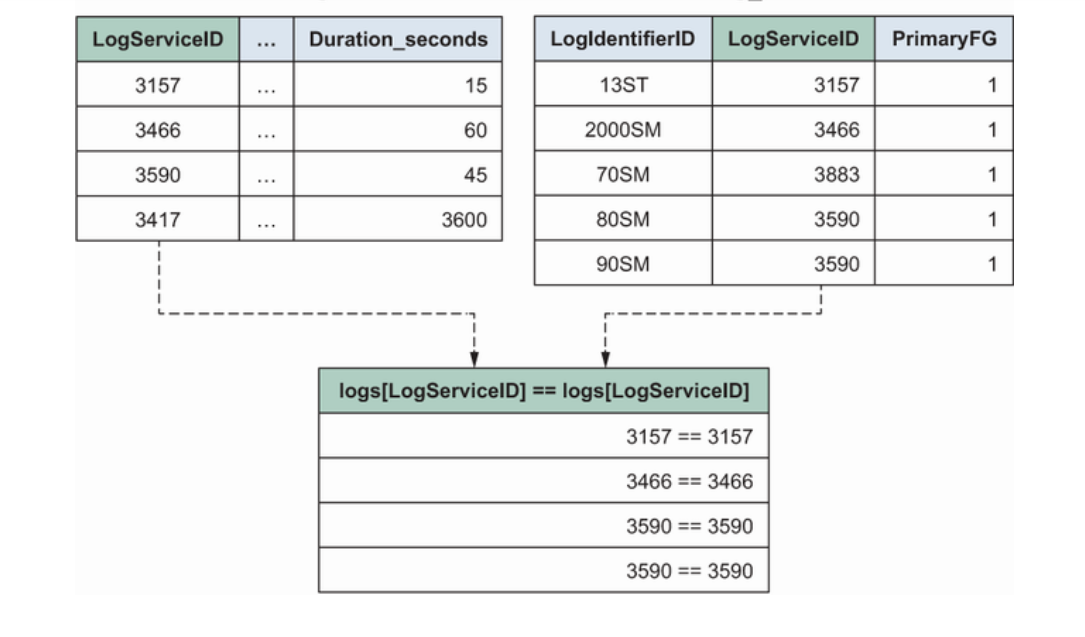

# Inner join

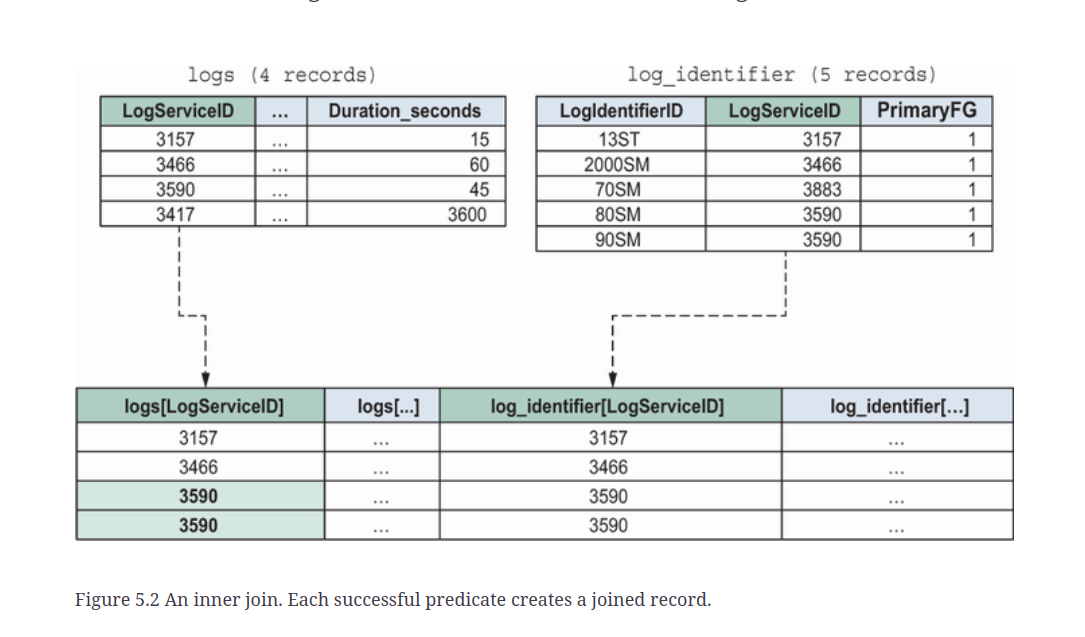

# Left and Right Outer Join
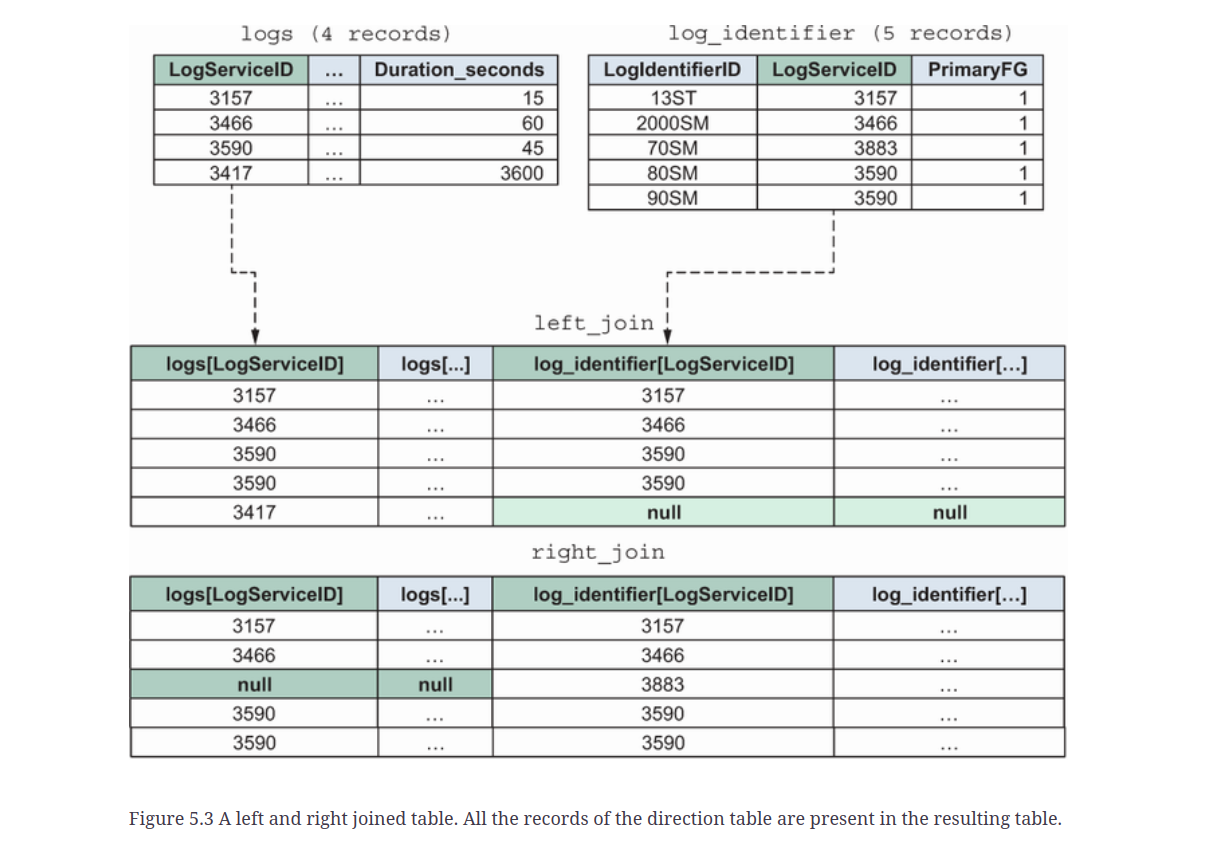

### left join
take the rows of the left and find matches in the right, no match is null

### right join
take rows of right and find matches in the left, no match is null

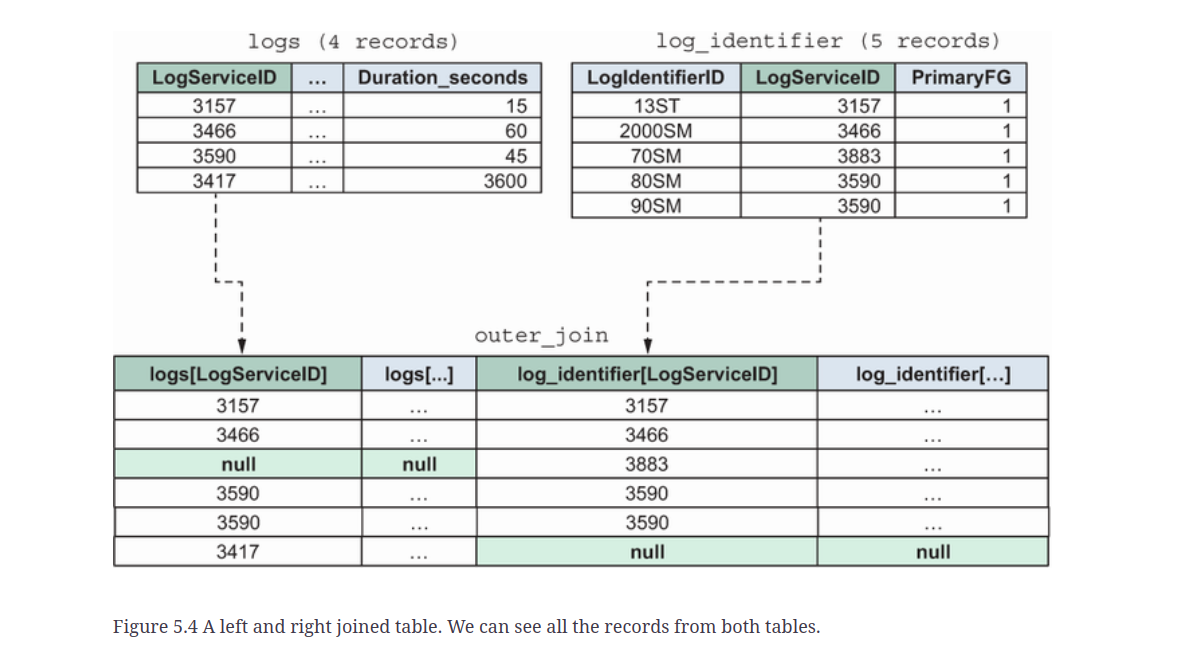

In [9]:
# listing 5.6 join generates two seeminly identical columns
logs_and_channels_verbose = logs.join(log_identifier, logs[LogServiceID]==log_identifier[LogServiceID])

logs_and_channels_verbose.printSchema()

root
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable 

In [12]:
from pyspark.sql.utils import AnalysisException

try:
    logs_and_channels_verbose.select(LogServiceID)
except AnalysisException as e:
    print(e)


[AMBIGUOUS_REFERENCE] Reference `LogServiceID` is ambiguous, could be: [`LogServiceID`, `LogServiceID`].


In [13]:
# solve above with simple equijoin
logs_and_channels = logs.join(log_identifier, LogServiceID)
logs_and_channels.printSchema()


root
 |-- LogServiceID: integer (nullable = true)
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable 

In [ ]:
# approach 2 to avoid duplicate columns


# More Join Examples from ChatGPT

```bash
         logs
+-------------+-----------------+               log_identifier
| LogServiceID | Duration_seconds |             +----------------+-------------+-----------+
+-------------+-----------------+              | LogIdentifierID | LogServiceID | PrimaryFG |
| 3590        | 45              |              +----------------+-------------+-----------+
| 3157        | 15              |              | 80SM           | 3590        | 1         |
| 3417        | 3600            |      +-------| 13ST           | 3157        | 1         |
| 3466        | 60              |      |       | 70SM           | 3883        | 1         |
+-------------+-----------------+      |       | 90SM           | 3590        | 1         |
                                       |       | 2000SM         | 3466        | 1         |
                                       |       +----------------+-------------+-----------+
                                       |
                                       |       Result of Full Outer Join
                                       |       +-------------+-----------------+----------------+-------------+-----------+
                                       +-----> | LogServiceID | Duration_seconds | LogIdentifierID | LogServiceID | PrimaryFG |
                                               +-------------+-----------------+----------------+-------------+-----------+
                                               | 3590        | 45              | 80SM           | 3590        | 1         |
                                               | 3157        | 15              | 13ST           | 3157        | 1         |
                                               | NULL        | NULL            | 70SM           | 3883        | 1         | <- No match in logs
                                               | 3590        | 45              | 90SM           | 3590        | 1         |
                                               | 3466        | 60              | 2000SM         | 3466        | 1         |
                                               | 3417        | 3600            | NULL           | NULL        | NULL      | <- No match in log_identifier
                                               +-------------+-----------------+----------------+-------------+-----------+

```

```bash
 Result of Full Outer Join
+-------------+-----------------+----------------+-----------+
| LogServiceID | Duration_seconds | LogIdentifierID | PrimaryFG |
+-------------+-----------------+----------------+-----------+
| 3590        | 45              | 80SM           | 1         |
| 3157        | 15              | 13ST           | 1         |
| 3417        | 3600            | NULL           | NULL      | <- No match in log_identifier
| 3466        | 60              | 2000SM         | 1         |
| 3590        | 45              | 90SM           | 1         |
| 3883        | NULL            | 70SM           | 1         | <- No match in logs
+-------------+-----------------+----------------+-----------+
```

# The result is a Cartesian product of the common rows between left and right
```python
 L: {3590a, 3590b} 
 R: {3590x, 3590y, 3590z}

 Cartesian Product for 3590: {
     (3590a, 3590x),
     (3590a, 3590y),
     (3590a, 3590z),
     (3590b, 3590x),
     (3590b, 3590y),
     (3590b, 3590z)
 }

```

Certainly! A **left semi-join** returns all rows from the left table that have a corresponding row in the right table, based solely on the join condition. It does not return any rows from the right table, nor does it return any rows from the left table that do not have a match in the right table.

Conversely, a **left anti-join** returns all rows from the left table that do not have a corresponding row in the right table, again based solely on the join condition.

Let's illustrate both with the tables provided earlier:

### Source Tables:

**logs** (left table)
```
+-------------+-----------------+
| LogServiceID | Duration_seconds |
+-------------+-----------------+
| 3590        | 45              |
| 3590        | 75              |
| 3157        | 15              |
| 3417        | 3600            |
| 3466        | 60              |
+-------------+-----------------+
```

**log_identifier** (right table)
```
+----------------+-------------+-----------+
| LogIdentifierID | LogServiceID | PrimaryFG |
+----------------+-------------+-----------+
| 80SM           | 3590        | 1         |
| 13ST           | 3157        | 1         |
| 70SM           | 3883        | 1         |
| 90SM           | 3590        | 1         |
| 95SM           | 3590        | 1         |
| 2000SM         | 3466        | 1         |
+----------------+-------------+-----------+
```

### Left Semi-Join Result:

The left semi-join will return rows from `logs` where `LogServiceID` matches `LogServiceID` in `log_identifier`.

```
 Left Semi-Join (logs with log_identifier)
+-------------+-----------------+
| LogServiceID | Duration_seconds |
+-------------+-----------------+
| 3590        | 45              | <- Match found in log_identifier
| 3590        | 75              | <- Match found in log_identifier (repeated due to matching key)
| 3157        | 15              | <- Match found in log_identifier
| 3466        | 60              | <- Match found in log_identifier
+-------------+-----------------+
```

Note that `3417` from `logs` is not present because it does not match any `LogServiceID` in `log_identifier`.

### Left Anti-Join Result:

The left anti-join will return rows from `logs` where `LogServiceID` does not have a corresponding match in `log_identifier`.

```
 Left Anti-Join (logs without log_identifier)
+-------------+-----------------+
| LogServiceID | Duration_seconds |
+-------------+-----------------+
| 3417        | 3600            | <- No matching LogServiceID in log_identifier
+-------------+-----------------+
```

Here, only `3417` from `logs` is returned because it's the only `LogServiceID` without a match in `log_identifier`.

These join types are particularly useful when you are interested in filtering rows based on the existence (or lack thereof) of matching data in another table, rather than actually combining the data from both tables.

# Cross Join (nuclear option)

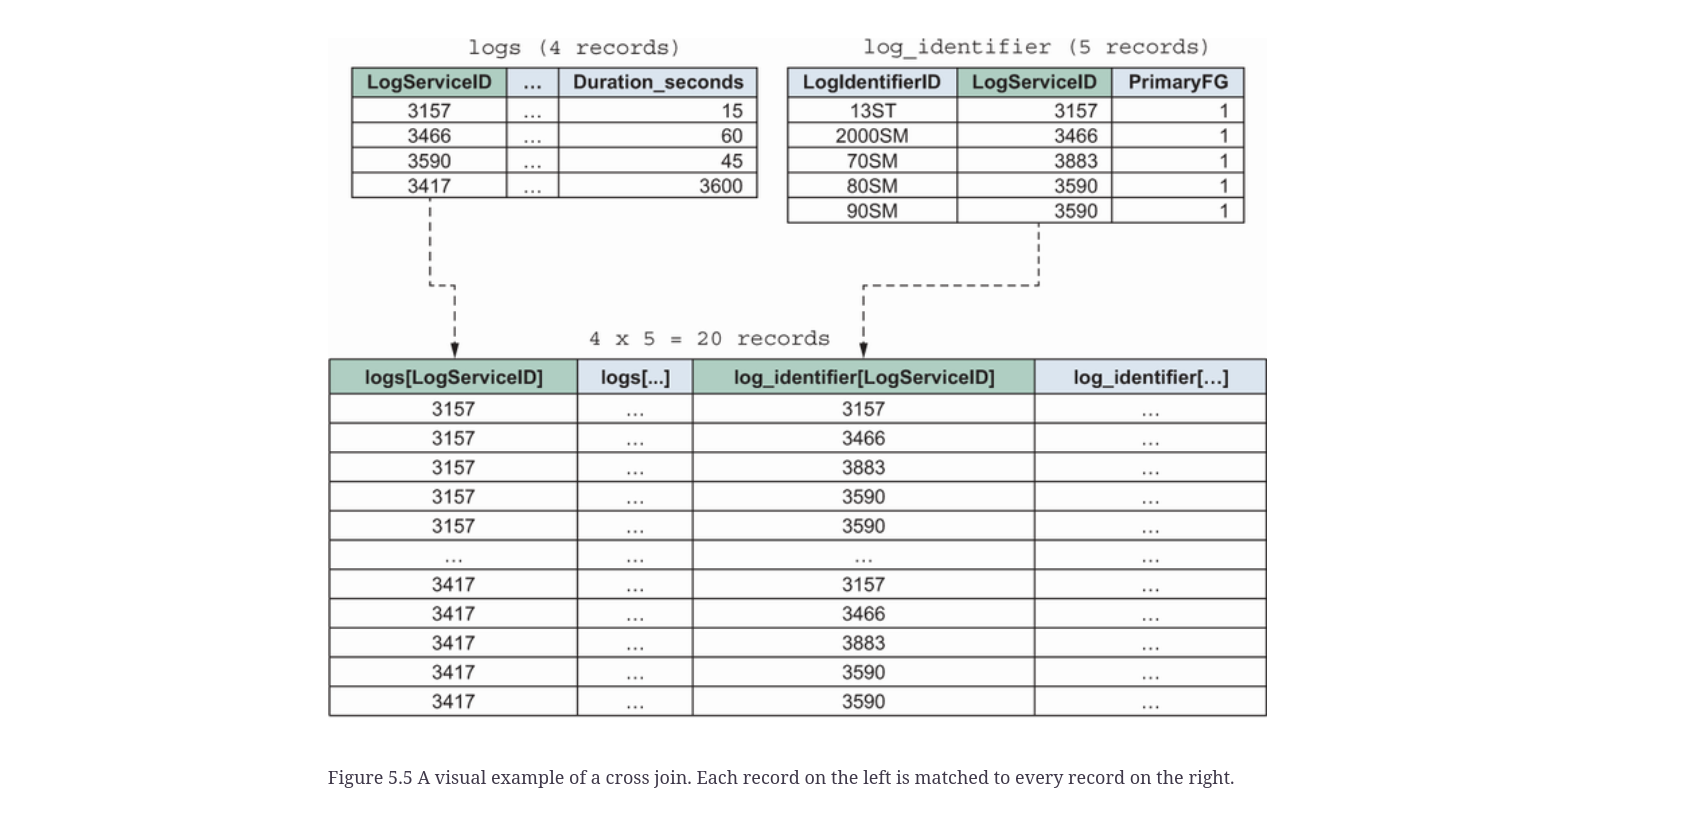

4 records left and 5 records right = 20 records total

